## load traffic and climate logs

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

### load logs and print test error

In [10]:
exp='traffic'
time_stamp ="10-17-17-00-13-07"
# models =["LSTM","MLSTM","TLSTM"] #'phased_lstm']#
models=["TALSTM"]
hz_list= [8,16, 32, 64]
ts_list = [1, 7 , 13, 19, 23]
lr_list =[3]



import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(hz, ts, model):
    data_path = "/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"hz-"+ str(hz)+"/ts-"+ str(ts) +"/"
    f_pred= "predict.npy"
    f_err = "config.out"
    try:
        pred =  np.load(data_path+f_pred )
        with open(data_path+""+f_err,'r') as fstream:
            config = read_config(fstream)
        print(data_path)
        return config, pred
    except FileNotFoundError:
        return None, None

errs = np.ones((len(hz_list),len(ts_list)))
i=0
for ts in ts_list:
    j=0
    for model in models: 
        k=0
        for hz in hz_list:
            try:
                config, pred = load_log(hz, ts*12, model)
                print('train error:',config['train_error'],'test err:',config['test_error'])
                errs[k,i] =  config['test_error']
            except:
                pass
            k +=1
        j +=1
    i +=1


/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-8/ts-12/
train error: 0.114663 test err: 0.125299
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-16/ts-12/
train error: 0.0797495 test err: 0.0735936
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-32/ts-12/
train error: 0.06096 test err: 0.0717671
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-64/ts-12/
train error: 0.0661313 test err: 0.0719024
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-8/ts-84/
train error: 0.128457 test err: 0.124749
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-16/ts-84/
train error: 0.111333 test err: 0.106429
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-32/ts-84/
train error: 0.0930347 test err: 0.0908391
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-64/ts-84/
train error: 0.0930507 test err: 0.093074
/tmp/tensorRNN/log/traffic/10-17-17-00-13-07/TALSTM/hz-8/ts-156/
train error: 0.127236 test err: 0.125242
/tmp/tensorRNN/log/traffic/10-17-17-00-13

In [14]:
print(errs.shape)
print(np.min(errs,axis=0))

(4, 5)
[ 0.0717671  0.0908391  0.0931007  0.0953369  0.0977143]


### Compare different methods

(5, 3)
[[ 0.0761427  0.0752521  0.0735487]
 [ 0.0985387  0.0885231  0.084865 ]
 [ 0.0997028  0.0975014  0.0927951]
 [ 0.109822   0.0982566  0.0947795]
 [ 0.102317   0.121177   0.115179 ]]


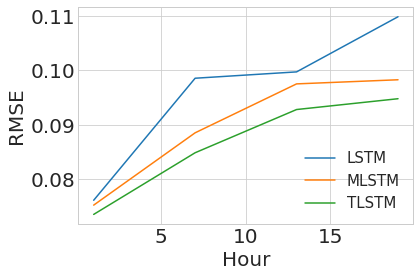

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

params = {
   'axes.labelsize': 20,
   'font.size': 12,
   'legend.fontsize': 15,
   'xtick.labelsize': 20,
   'ytick.labelsize': 20,
   'text.usetex': False,
   }
mpl.rcParams.update(params)
sns.set_style("whitegrid")
sns.despine()
print(errs.shape)

print(errs)
xs = np.array([ts for ts in ts_list])
plt.plot(xs[:-1], errs[:-1,:])
plt.legend(['LSTM','MLSTM','TLSTM'])
plt.xlabel('Hour')
plt.ylabel('RMSE')

# np.save('./traffic_model_step.npy',errs)

### load test prediction

rmse 0.0912316915465
rmse 0.114863596061
rmse 0.0931619659464


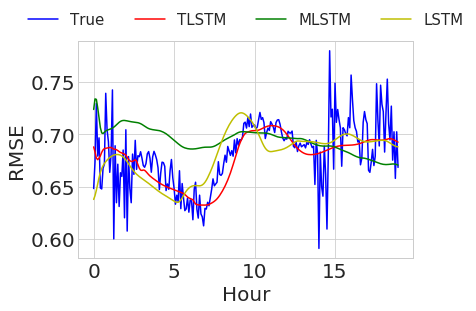

In [102]:
import numpy as np
import sklearn 
from sklearn.metrics import mean_squared_error


def RMSE(y_pred, y_true):
    """RMSE"""
    t1 = np.linalg.norm(y_pred-y_true)**2 / np.size(y_true)
    return np.sqrt(t1)

exp="traffic"

ts= 19

def get_pred(model):
    data_path = "/tmp/tensorRNN/log/"+exp+"/"+time_stamp+"/"+model+"/"+"lr-1e-"+ str(lr)+"/ts-"+ str(ts*12) +"/"
    true, pred = np.load(data_path+'predict.npy')

    diff = (true-pred)**2
    diff = diff.flatten()
    mse = np.sum(diff)/diff.size
    val = np.sqrt(mse)

    print('rmse', val)
    return pred

    
x1  = get_pred('TLSTM')
x2  = get_pred('MLSTM')
x3  = get_pred('LSTM')

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt


i= 3
x = np.arange(0,ts*12)/12
fig = plt.figure()
ax = fig.gca()
ax.plot(x, true[i,:,0],'b',label='True')
ax.plot(x, x1[i,:,0],'r-', label='TLSTM')
ax.plot(x, x2[i,:,0],'g-',label='MLSTM')
ax.plot(x, x3[i,:,0],'y-', label='LSTM')

# ax.legend(['True','TLSTM','MLSTM','LSTM'])
plt.xlabel('Hour')
plt.ylabel('RMSE')
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.),
          ncol=4, fancybox=True, shadow=True)

## Load Genz function results

In [1]:
time_stamp ="10-04-17-19-01-04"
exps= ['f1','f2','f3','f4','f5','f6']
models =["LSTM","TLSTM"] #'phased_lstm']#

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def read_config(fstream):
    d = {}
    for line in fstream:
        line.rstrip()
        tokens = line.split('\t')
        for token in tokens:
            try:
                key, val = token.split(":")
                d[key] = float(val)                
            except ValueError:
                'error prop'
    return d

def load_log(exp, model):
    data_path = "/var/tmp/tensorRNN/log/"+exp+"/10-04-17-19-02-07/genz-"+exp+"/"+model+"/"
    print(data_path)
    f_pred= "predict.npy"
    f_err = "config.out"
    pred =  np.load(data_path+f_pred )
    with open(data_path+""+f_err,'r') as fstream:
        config = read_config(fstream)
    return config, pred

errs = np.ones((len(exps), len(models)))
i=0
for exp in exps:
    j=0
    for model in models:
        try:
            config, pred = load_log(exp, model)
            print('train error:',config['train_error'],'test err:',config['test_error'])
            errs[i,j] =  config['test_error']
        except FileNotFoundError:
            print('not found')
            
        j +=1
    i +=1


/var/tmp/tensorRNN/log/f1/10-11-17-22-19-29/genz-f1/LSTM/
not found
/var/tmp/tensorRNN/log/f1/10-11-17-22-19-29/genz-f1/TLSTM/
not found
/var/tmp/tensorRNN/log/f2/10-11-17-22-19-29/genz-f2/LSTM/
not found
/var/tmp/tensorRNN/log/f2/10-11-17-22-19-29/genz-f2/TLSTM/
not found
/var/tmp/tensorRNN/log/f3/10-11-17-22-19-29/genz-f3/LSTM/
not found
/var/tmp/tensorRNN/log/f3/10-11-17-22-19-29/genz-f3/TLSTM/
not found
/var/tmp/tensorRNN/log/f4/10-11-17-22-19-29/genz-f4/LSTM/
not found
/var/tmp/tensorRNN/log/f4/10-11-17-22-19-29/genz-f4/TLSTM/
not found
/var/tmp/tensorRNN/log/f5/10-11-17-22-19-29/genz-f5/LSTM/
not found
/var/tmp/tensorRNN/log/f5/10-11-17-22-19-29/genz-f5/TLSTM/
not found
/var/tmp/tensorRNN/log/f6/10-11-17-22-19-29/genz-f6/LSTM/
not found
/var/tmp/tensorRNN/log/f6/10-11-17-22-19-29/genz-f6/TLSTM/
not found


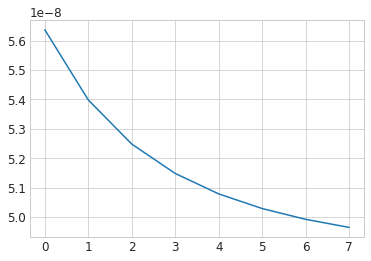

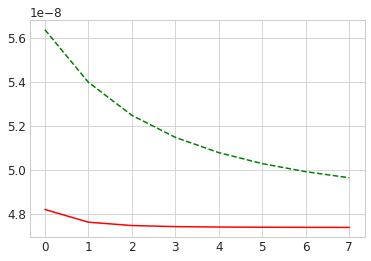

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
# plotting configuration
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 20,
   'xtick.labelsize': 12,
   'ytick.labelsize': 12,
   'text.usetex': False,
   }
mpl.rcParams.update(params)
sns.set_style("whitegrid")
sns.despine()

exp = 'f5'

i= 10


model = 'LSTM'
data_path = "/tmp/tensorRNN/log/genz/"+exp+"/10-11-17-22-19-29"+"/"+model+"/"

true, pred = np.load(data_path+'predict.npy')
plt.figure()
plt.plot(true[i,:,0])

plt.figure()
plt.plot(pred[i,:,0],'g--',label=model)
model = 'TLSTM'
data_path = "/tmp/tensorRNN/log/genz/"+exp+"/10-11-17-22-19-29"+"/"+model+"/"
true, pred = np.load(data_path+'predict.npy')
plt.plot(pred[i,:,0],'r-',label=model)
